In [28]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
activation_path = './GLM/activation.pickle'
beta_path = './GLM/beta.pickle'
truth_path = './Data/beta_truth/Beta_tfMRI_MOTOR_LR_Glasser360.mat'

In [30]:
activation = np.load(activation_path, allow_pickle = True)
beta = np.load(beta_path, allow_pickle = True)
truth = scipy.io.loadmat(truth_path)
truth = truth['Beta']
truth = np.swapaxes(truth, 2, 0)

In [31]:
truth[0,0,:]

array([-0.25494214, -0.63766853, -0.0529519 ,  0.0293504 , -0.45453154])

In [32]:
beta.shape

(100, 379, 5)

In [33]:
truth.shape

(100, 379, 5)

In [34]:
beta[0,0,:]

array([-0.25494214, -0.63766853, -0.0529519 ,  0.0293504 , -0.45453154])

In [35]:
activation[0,1,:]

array([0., 0., 0., 1., 0.])

In [36]:
m, n, r = beta.shape
arr = np.column_stack((np.repeat(np.arange(m),n),beta.reshape(-1, beta.shape[-1])))
df = pd.DataFrame(arr)
df.rename(columns={df.columns[0]: "subject" }, inplace=True)

In [37]:
df

,subject,1,2,3,4,5
0,0.0,-0.254942,-0.637669,-0.052952,0.029350,-0.454532
1,0.0,-0.322812,0.029082,0.093908,-0.593544,0.131114
2,0.0,-0.622510,-0.364706,-0.164954,0.107074,-0.034593
3,0.0,-0.284301,-0.475949,0.024050,-0.035999,-0.426032
4,0.0,-0.318083,-0.576688,0.205820,0.039195,-0.436967
...,...,...,...,...,...,...
37895,99.0,-0.075156,-0.081275,-0.282101,0.090821,-0.090378
37896,99.0,0.058744,0.032962,-0.437506,0.048232,0.056889
37897,99.0,-0.034029,0.023332,-0.203585,0.007171,-0.419598
37898,99.0,-0.049654,0.289397,0.436186,-0.820580,-0.176926


<AxesSubplot:>

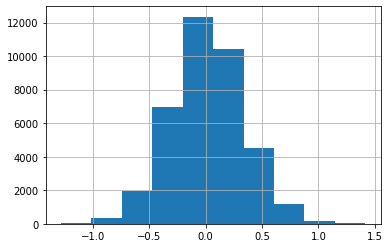

In [38]:
df[1].hist()

In [39]:
m, n, r = truth.shape
arr = np.column_stack((np.repeat(np.arange(m),n),truth.reshape(-1, truth.shape[-1])))
df_t = pd.DataFrame(arr)
df_t.rename(columns={df_t.columns[0]: "subject" }, inplace=True)

In [40]:
df_t

,subject,1,2,3,4,5
0,0.0,-0.254942,-0.637669,-0.052952,0.029350,-0.454532
1,0.0,-0.322812,0.029082,0.093908,-0.593544,0.131114
2,0.0,-0.622510,-0.364706,-0.164954,0.107074,-0.034593
3,0.0,-0.284301,-0.475949,0.024050,-0.035999,-0.426032
4,0.0,-0.318083,-0.576688,0.205820,0.039195,-0.436967
...,...,...,...,...,...,...
37895,99.0,-0.075156,-0.081275,-0.282101,0.090821,-0.090378
37896,99.0,0.058744,0.032962,-0.437506,0.048232,0.056889
37897,99.0,-0.034029,0.023332,-0.203585,0.007171,-0.419598
37898,99.0,-0.049654,0.289397,0.436186,-0.820580,-0.176926


<AxesSubplot:>

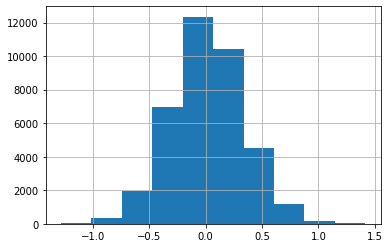

In [41]:
df_t[1].hist()

In [42]:
new = df.merge(df_t, left_index = True, right_index = True)

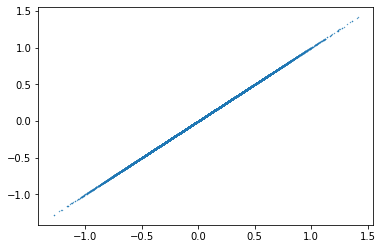

In [43]:
plt.scatter(new['1_x'], new['1_y'], marker = '.', s = .5)

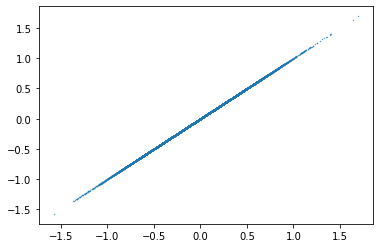

In [44]:
plt.scatter(new['2_x'], new['2_y'], marker = '.', s = .5)

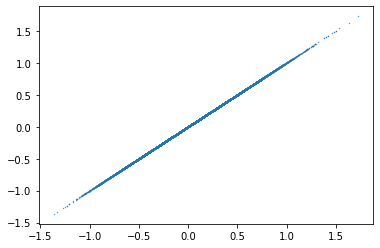

In [45]:
plt.scatter(new['3_x'], new['3_y'], marker = '.', s = .5)

<function matplotlib.pyplot.show(close=None, block=None)>

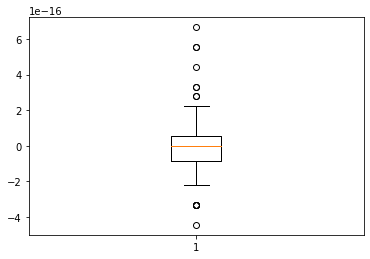

In [46]:
plt.boxplot(df[df['subject'] == 0][1]-df_t[df_t['subject'] == 0][1])
plt.show

In [47]:
df[1].corr(df_t[1])

1.0